## Making Woody biomass and wood pellet map

These are the steps used to create a high level graphic map for the Sustaining Bioenergy poster project

In [1]:
import pandas as pd
import lxml
import requests
import geopandas as gpd
import zipfile
import io
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = 'http://biomassmagazine.com/plants/listplants/pellet/US/'
#check website is up
response = requests.get(url)
#Store the contents of the website under doc
if response.status_code == 200:
    dfs = pd.read_html(url)
    print(len(dfs))

3


In [7]:
last_updated = dfs[0].iloc[0,1]
last_updated

'Last Modified on September 21, 2018 *Capacity noted in (Metric tons/yr)'

In [8]:
df = dfs[1]
df.columns = df.iloc[0]
df = df.drop(0)
df['Operational'] = True
df

,Plant,Location,Feedstock,Capacity,Operational
1,Alexander Energy,PA,Hardwood,7700,True
2,American Wood Fibers-Circleville,OH,Hardwood/softwood,45400,True
3,American Wood Fibers-Marion,VA,Hardwood/softwood,68000,True
4,American Wood Fibers-Wisconsin,WI,Hardwood/softwood,22700,True
5,Amite BioEnergy,MS,Softwood,525000,True
6,Appalachian Wood Pellets,WV,Hardwood,50000,True
7,Appling County Pellets LLC,GA,Hardwood/softwood,200000,True
8,Associated Harvest,NY,Hardwood,7300,True
9,Bald Eagle Pellet,PA,Hardwood,2100,True
10,Barefoot Pellet,PA,Hardwood,40800,True


In [9]:
location_url = 'http://biomassmagazine.com/plants/pellet_json/'
import json
with open('pellet_mills.json') as f:
    pellet_locations = json.load(f)

pellet_locations
pellet_count = pellet_locations['count']
pellet_count

pellet_facility_loc = pellet_locations['plants']

In [35]:
pellet_facility_loc_df = pd.DataFrame.from_dict(pellet_facility_loc, na_values=['null'])
pellet_facility_loc_df

TypeError: from_dict() got an unexpected keyword argument 'na_values'

In [17]:
pellet_facilities = df.join(pellet_facility_loc_df, lsuffix='Plant', rsuffix='Title', how='left')
pellet_facilities

,Plant,Location,Feedstock,Capacity,Operational,city,id,lat,long,state,title,url
1,Alexander Energy,PA,Hardwood,7700,True,Kane,6748,41.666859,-78.814313,PA,Alexander Energy,/plants/view/6748
2,American Wood Fibers-Circleville,OH,Hardwood/softwood,45400,True,Circleville,6749,39.562195,-82.943366,OH,American Wood Fibers-Circleville,/plants/view/6749
3,American Wood Fibers-Marion,VA,Hardwood/softwood,68000,True,Schofield,6751,44.921923,-89.600801,WI,American Wood Fibers-Wisconsin,/plants/view/6751
4,American Wood Fibers-Wisconsin,WI,Hardwood/softwood,22700,True,Marion,6750,36.813236,-81.649159,VA,American Wood Fibers-Marion,/plants/view/6750
5,Amite BioEnergy,MS,Softwood,525000,True,Kingwood,6752,39.46687,-79.647725,WV,Appalachian Wood Pellets,/plants/view/6752
6,Appalachian Wood Pellets,WV,Hardwood,50000,True,La Fargeville,6753,44.160488,-75.973302,NY,Associated Harvest,/plants/view/6753
7,Appling County Pellets LLC,GA,Hardwood/softwood,200000,True,Tyrone,6754,40.709858,null,PA,Bald Eagle Pellet,/plants/view/6754
8,Associated Harvest,NY,Hardwood,7300,True,Troy,6755,41.813087,-76.786779,PA,Barefoot Pellet,/plants/view/6755
9,Bald Eagle Pellet,PA,Hardwood,2100,True,Arcade,2263,42.526357,-78.455547,NY,Dry Creek Products,/plants/view/2263
10,Barefoot Pellet,PA,Hardwood,40800,True,Ulysses,6756,41.899338,-77.778354,PA,PA Pellets,/plants/view/6756


In [18]:
pellet_facilities.columns
pellet_facilities = pellet_facilities.drop(columns=['Location','title','url'])
pellet_facilities

,Plant,Feedstock,Capacity,Operational,city,id,lat,long,state
1,Alexander Energy,Hardwood,7700,True,Kane,6748,41.666859,-78.814313,PA
2,American Wood Fibers-Circleville,Hardwood/softwood,45400,True,Circleville,6749,39.562195,-82.943366,OH
3,American Wood Fibers-Marion,Hardwood/softwood,68000,True,Schofield,6751,44.921923,-89.600801,WI
4,American Wood Fibers-Wisconsin,Hardwood/softwood,22700,True,Marion,6750,36.813236,-81.649159,VA
5,Amite BioEnergy,Softwood,525000,True,Kingwood,6752,39.46687,-79.647725,WV
6,Appalachian Wood Pellets,Hardwood,50000,True,La Fargeville,6753,44.160488,-75.973302,NY
7,Appling County Pellets LLC,Hardwood/softwood,200000,True,Tyrone,6754,40.709858,null,PA
8,Associated Harvest,Hardwood,7300,True,Troy,6755,41.813087,-76.786779,PA
9,Bald Eagle Pellet,Hardwood,2100,True,Arcade,2263,42.526357,-78.455547,NY
10,Barefoot Pellet,Hardwood,40800,True,Ulysses,6756,41.899338,-77.778354,PA


In [53]:
pellet_facilities_clean = pellet_facilities.query('lat != "null" & long != "null"').copy()
pellet_facilities_clean['long'] = pd.to_numeric(pellet_facilities_clean['long'])
pellet_facilities_clean['lat'] = pd.to_numeric(pellet_facilities_clean['lat'])

In [54]:
geometry = [Point(xy) for xy in zip(pellet_facilities_clean.long, pellet_facilities_clean.lat)]

In [14]:
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [120]:
pellet_facilities_gdf = gpd.GeoDataFrame(pellet_facilities_clean, geometry=geometry)

In [121]:
pellet_facilities_gdf.drop(columns='Operational').to_file('pellet_facilities.geojson', driver='GeoJSON')

In [98]:
pellet_facilities_gdf.crs = {'init' :'epsg:4326'} 

In [27]:
pellet_facilities_gdf = gpd.read_file('pellet_facilities.geojson')

In [28]:
pellet_facilities_gdf.crs

{'init': 'epsg:4326'}

In [99]:
print(pellet_facilities_gdf.head())

                              Plant          Feedstock Capacity  Operational  \
1                  Alexander Energy           Hardwood     7700         True   
2  American Wood Fibers-Circleville  Hardwood/softwood    45400         True   
3       American Wood Fibers-Marion  Hardwood/softwood    68000         True   
4    American Wood Fibers-Wisconsin  Hardwood/softwood    22700         True   
5                   Amite BioEnergy           Softwood   525000         True   

          city    id        lat       long state  \
1         Kane  6748  41.666859 -78.814313    PA   
2  Circleville  6749  39.562195 -82.943366    OH   
3    Schofield  6751  44.921923 -89.600801    WI   
4       Marion  6750  36.813236 -81.649159    VA   
5     Kingwood  6752  39.466870 -79.647725    WV   

                              geometry  
1         POINT (-78.814313 41.666859)  
2         POINT (-82.943366 39.562195)  
3         POINT (-89.600801 44.921923)  
4         POINT (-81.649159 36.813236)  
5

In [43]:
county_file_url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_us_county_500k.zip'
print('Downloading shapefile...')
r = requests.get(county_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print("Done")
z.extractall(path='tmp/') # extract to folder
filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(filenames)

Done
['cb_2015_us_county_500k.dbf', 'cb_2015_us_county_500k.prj', 'cb_2015_us_county_500k.shp', 'cb_2015_us_county_500k.shx']


In [11]:
[filename for filename in filenames]

['cb_2015_us_county_500k.dbf',
 'cb_2015_us_county_500k.prj',
 'cb_2015_us_county_500k.shp',
 'cb_2015_us_county_500k.shx']

In [8]:
z

<zipfile.ZipFile file=<_io.BytesIO object at 0x00000200156C5BF8> mode='r'>

In [5]:
import numpy as np
import pandas as pd

In [2]:
filenames = ['cb_2017_us_county_500k.dbf',
 'cb_2017_us_county_500k.prj',
 'cb_2017_us_county_500k.shp',
 'cb_2017_us_county_500k.shx']

In [3]:
dbf, prj, shp, shx = [filename for filename in filenames]
usa = gpd.read_file(f'tmp/{shp}')
print("Shape of the dataframe: {}".format(usa.shape))
print("Projection of dataframe: {}".format(usa.crs))
usa.tail() #last 5 records in dataframe

Shape of the dataframe: (3233, 10)
Projection of dataframe: {'init': 'epsg:4269'}


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
3228,37,069,01008553,0500000US37069,37069,Franklin,06,1273631713,7304032,"POLYGON ((-78.545513 36.056699, -78.5449309999..."
3229,48,317,01383941,0500000US48317,48317,Martin,06,2369724595,1931832,"POLYGON ((-102.211033 32.177037, -102.211111 3..."
3230,54,107,01560558,0500000US54107,54107,Wood,06,948592039,27228519,"POLYGON ((-81.7558150545194 39.1805241965567, ..."
3231,13,269,00344156,0500000US13269,13269,Taylor,06,975612265,7802363,"(POLYGON ((-84.05331 32.522021, -84.0084899999..."
3232,01,003,00161527,0500000US01003,01003,Baldwin,06,4117605847,1133109409,"POLYGON ((-88.02857999999999 30.226763, -88.02..."


C:\Users\email\Miniconda3\envs\mapenv\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysalnext` package. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
C:\Users\email\Miniconda3\envs\mapenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'States by FIPS')

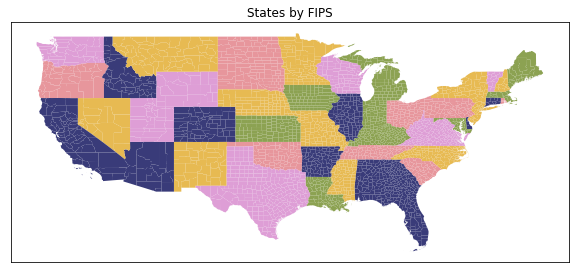

In [6]:
usa = usa[np.logical_not(usa.STATEFP.isin(['02','15']))]
usa.STATEFP = pd.to_numeric(usa.STATEFP)
usa = usa.query('STATEFP < 57')
ax = usa.plot(figsize=(10,10), column='STATEFP', cmap="tab20b", scheme='quantiles', legend=False)
ax.set(xticks=[], yticks=[]) #removes axes
ax.set_title("States by FIPS", fontsize='large')

In [7]:
se = usa[usa.STATEFP.isin(['05','22','12','47','51','37','45','13','01','28'])]

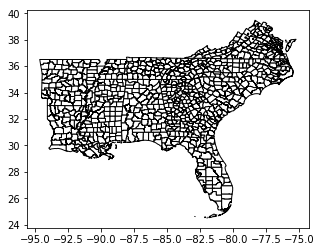

In [8]:
se.plot(color='white', edgecolor='black')

In [9]:
se.crs

{'init': 'epsg:4269'}

In [11]:
se.to_file('southeast_counties.geojson', driver='GeoJSON')

In [5]:
se = gpd.read_file('southeast_counties.geojson')

In [47]:
pellet_facilities_se = pellet_facilities_gdf[pellet_facilities_gdf.state.isin(['AR','LA','VA','TN','NC','SC','GA','FL','AL','MS'])]

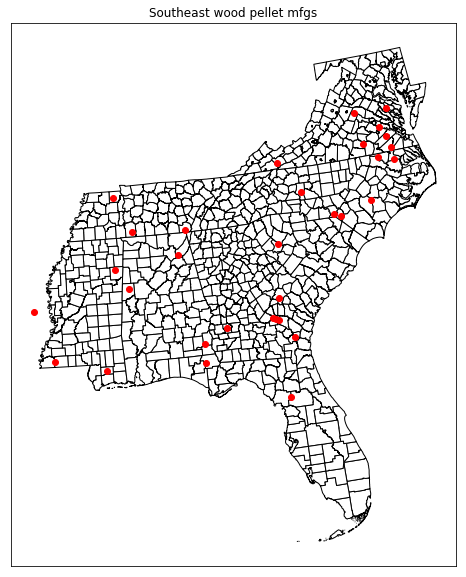

In [48]:
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
pellet_facilities_se = pellet_facilities_se.to_crs({'init' : 'epsg:5071'})
# We restrict to South America.
# world = world[(world.name == 'United States') | (world.name == 'Canada')]

se = se.to_crs({'init' :'epsg:5071'})

ax = se.plot(figsize=(10,10),color='white', edgecolor='black')
ax.set(xticks=[], yticks=[]) #removes axes
ax.set_title("Southeast wood pellet mfgs", fontsize='large')
# We can now plot our GeoDataFrame.
pellet_facilities_se.plot(ax=ax, color='red')

#plt.savefig('pellet_locations.svg', width = 1000, dpi = 600)

In [42]:
print('crop extent crs: ', se.crs)
print('lidar crs: ', soap_profile['crs'])

crop extent crs:  {'init': 'epsg:4269'}
lidar crs:  +ellps=GRS80 +lat_0=23 +lat_1=29.5 +lat_2=45.5 +lon_0=-96 +no_defs +proj=aea +towgs84=0,0,0,0,0,0,0 +units=m +x_0=0 +y_0=0


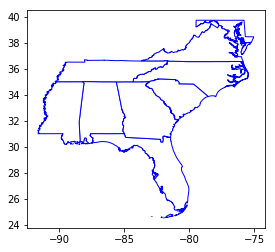

In [8]:
se_blob = se.dissolve(by='STATEFP')
se_blob.plot(color='white', edgecolor='b')

In [44]:
se_blob.to_crs({'init':'EPSG:5071'})
se_blob.crs
extent_geojson = mapping(se_blob['geometry'][0])
extent_geojson

{'type': 'MultiPolygon',
 'coordinates': [(((-88.346745, 30.390702),
    (-88.345047, 30.3914),
    (-88.343507, 30.391445),
    (-88.342384, 30.391468),
    (-88.341235, 30.391738),
    (-88.340504, 30.391513),
    (-88.335702, 30.389727),
    (-88.333095, 30.389878),
    (-88.33289, 30.389146),
    (-88.33412, 30.388741),
    (-88.335731, 30.388969),
    (-88.340765, 30.390161),
    (-88.342645, 30.390004),
    (-88.344316, 30.389981),
    (-88.345543, 30.389914),
    (-88.346823, 30.389936),
    (-88.346745, 30.390702)),),
  (((-88.053375, 30.506987),
    (-88.051088, 30.508857),
    (-88.045647, 30.513306),
    (-88.041966, 30.517376),
    (-88.03867, 30.520405),
    (-88.035099, 30.521967),
    (-88.032407, 30.521447),
    (-88.029165, 30.519648),
    (-88.026222, 30.516609),
    (-88.023506, 30.492573),
    (-88.02433, 30.490774),
    (-88.026748, 30.491105),
    (-88.045043, 30.501189),
    (-88.052349, 30.505591),
    (-88.053375, 30.506987)),),
  (((-88.327302, 30.229882),
   

In [39]:
crop_bounds = se_blob.total_bounds